We will use a package called `ApproxFun` in this tutorial. `ApproxFun` is a Julia package that is based on the Matlab package called `chebfun`. The `chebfun` package was written by Lloyd N. Trefethen (Nick Trefethen) and Zachary Battles in early 2004, then greatly extended starting around 2007 and is currently under active development. The idea is to use good function bases to represent functions numerically on the computer, instead of symbolically. 

In [25]:
using Pkg
Pkg.add("ApproxFun") # Add the package we'll need

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [26]:
using ApproxFun # use it!
using Plots
using LinearAlgebra

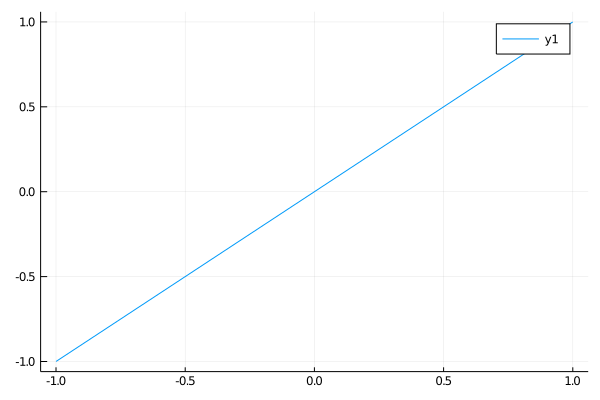

In [27]:
# We can use ApproxFun to build up functions
x = Fun(identity,-1..1) 
plot(x)

What is `x` here? `x` is a representation of the identify function $f(x) = x$ on the interval $[-1,1]$. It is represented in a basis of Chebyshev polynomials. You don't need to know much about that this point (we'll cover it in class), but this is a particularly useful basis. What matters is that we can compute with $f$ really easily!

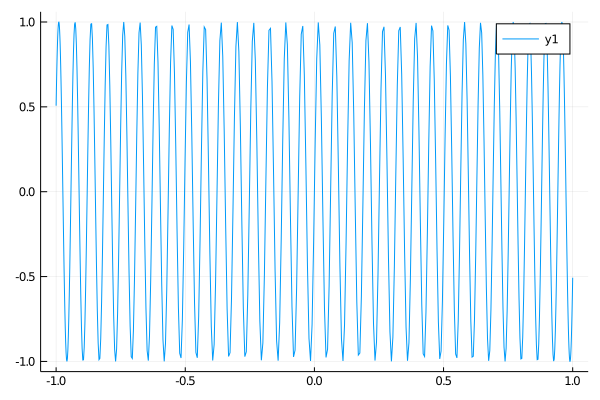

In [28]:
plot(sin(100*x))

In [30]:
x^5

Fun(Chebyshev(-1..1),[0.0, 0.625, 0.0, 0.3125, 0.0, 0.0625])

In [29]:
coefficients(sin(100*x))

158-element Array{Float64,1}:
  1.7389733381734487e-16
 -0.1542907040282252
  4.0041599305355443e-16
 -0.15256840344066472
  5.561110890818165e-16
 -0.14839147392902857
  8.143863090962278e-16
 -0.140345381974426
  1.159860833972936e-15
 -0.1264735228120621
  1.5659667160869922e-15
 -0.10458065203787296
  1.996287566577078e-15
  ⋮
 -5.1529530179783925e-28
 -9.555131773749372e-15
  7.841929767997596e-29
  1.427867514450423e-15
 -1.1509331338926886e-29
 -2.0585456274778582e-16
  1.6297459022669015e-30
  2.858218712222926e-17
 -2.195041616386377e-31
 -3.506845542912472e-18
  1.5979835887554e-32
 -4.0799281128200773e-19

Not only can we manipulate `x`, we can also find roots and derivatives! 

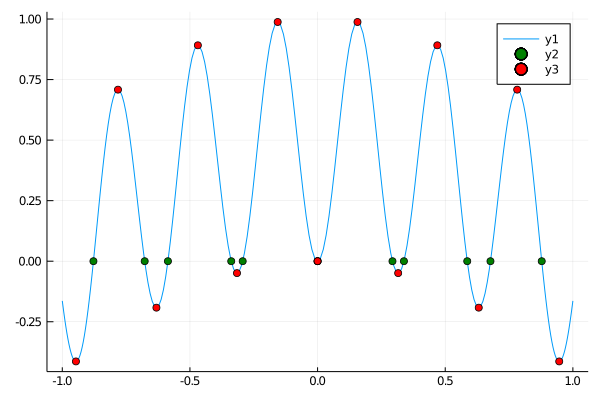

In [31]:
f = sin(10*x)^2
g = cos(x)
h = f+g-1

r = roots(h)
rp = roots(h') # compute the zeros of the derivate of h

plot(h)
scatter!(r,h.(r);color=:green)
scatter!(rp,h.(rp);color=:red)

In [32]:
f = Fun(x -> exp(-x), 1..5)
@show sum(f) 
@show exp(-1) - exp(-5.);

sum(f) = 0.36114149417235686
exp(-1) - exp(-5.0) = 0.36114149417235686


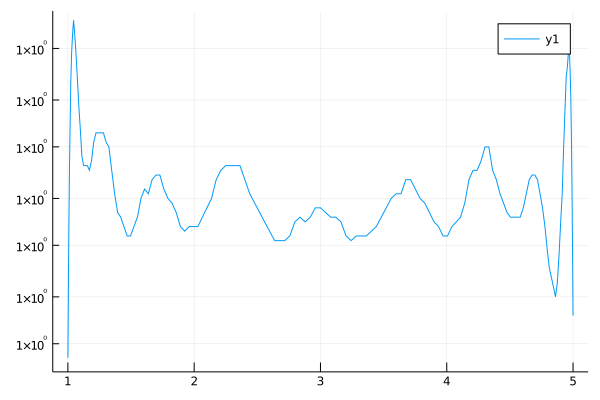

In [33]:
g = Fun(x -> exp(x), 1..5)
plot(f*g) # everything is a numerical approximation

In [12]:
extrema(f*g)

(0.9999999999999936, 1.0000000000000067)

In [35]:
@show norm(f-g,1)
@show norm(f-g,2)
@show norm(f-g,Inf); # why is this negative??? 

norm(f - g, 1) = 145.3337357799454
norm(f - g, 2) = 104.88854091031847
norm(f - g, Inf) = -2.350402387287577


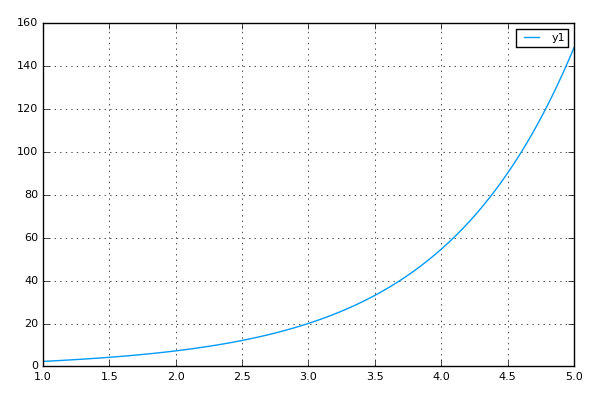

In [16]:
plot(abs(g-f))

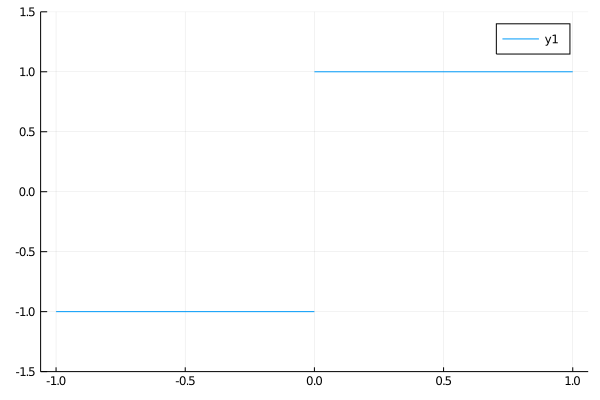

In [36]:
x = Fun(identity,-1..1)
f = sign(x)
plot(f, ylims=(-1.5,1.5))



In [40]:
@show norm(f-0.5,1);
@show norm(f-0.5,2);
@show norm(f-0.5,Inf);


norm(f - 0.5, 1) = 2.0
norm(f - 0.5, 2) = 1.5811388300841898
norm(f - 0.5, Inf) = 1.5


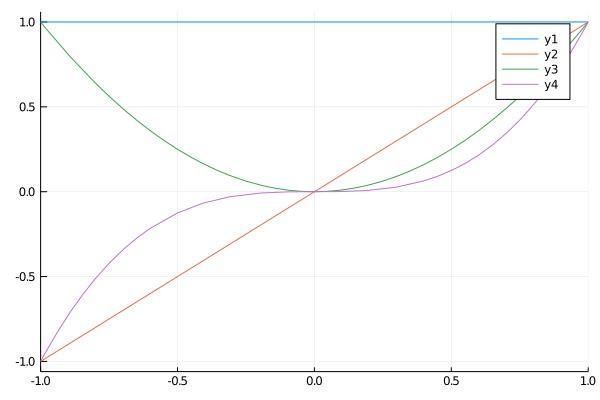

In [18]:
# ApproxFun can be useful to generate inner-product matrices and function bases
B = [(0.0.*x + 1.);x;x^2;x^3]
plot(B, xlims=(-1,1))


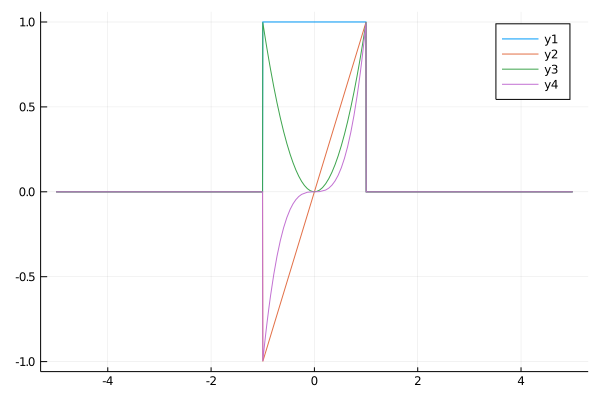

0.6666666666666666

In [20]:
# this isn't the gram-schmidt process for functions! 
# we can orthogonalize B
Pi = B # start with the basis
for j=2:length(B)
    for k=1:j-1
        Pi[j] .= Pi[j] - sum(B[j]*Pi[k])/sum(Pi[k]*Pi[k])*B[k]
    end
end
display(plot(Pi,xlims=))
sum(Pi[1]*Pi[3])

In [24]:
Pi[3]

Fun(4-element ArraySpace:
Chebyshev{Interval{:closed,:closed,Int64},Float64}[Chebyshev(-1..1), Chebyshev(-1..1), Chebyshev(-1..1), Chebyshev(-1..1)],[1.0, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.75, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.25])

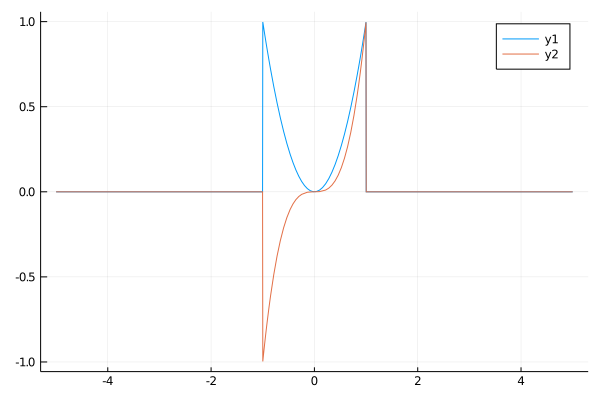